# ****Introdução****

Atualmente o absenteísmo no trabalho é considerado como a ausência do trabalhador em seu posto de trabalho, seja em decorrência de atrasos ou saídas antecipadas do serviço e é, atualmente, um dos principais problemas enfrentados pelas empresas e organizações.

O absenteísmo no trabalho é algo indesejável para as empresas e organizações, impactando negativamente na produtividade e no próprio clima organizacional (os funcionários, em geral, sentem-se desmotivados com as faltas dos colegas, além de sofrer com a sobrecarga de trabalho), gerando prejuizos financeiros as empresas.

A ausência de um único funcionário pode gerar uma lacuna naquele dia, numa linha de produção, na elaboração de um projeto ou uma tomada de decisão etc...

 O banco de dados foi criado com registros de absenteísmo no trabalho de julho de 2007 a julho de 2010 em uma empresa de courier no Brasil.
O conjunto de dados permite várias novas combinações de atributos e exclusões de atributos, ou a modificação do tipo de atributo (categórico, inteiro ou real) dependendo do propósito da pesquisa.

Vamos analisar os dados e observar algumas caracteristicas interessantes de perfis de funcionários, muitas vezes imaginamos que o funcionário mais indiciplinado é o que mais se falta, ou o funcionário com mais filhos, tais dados nesta empresa demonstram que muitas vezes nem tudo segue uma regra.

Ao final vamos elaborar um algoritimo com base no perfil dos funcionários que não possuem faltas, caso haja novas constratações poderá o Recursos Humanos se utilizar do algoritimopara o auxilio da contratação, se contrata ou não contrata, se tem o perfil de ser um colaborador que falta ou não.

# **** Introduction ****

Currently, absenteeism at work is considered as the absence of the worker from his/her job, either as a result of delays or anticipated service and, currently, one of the main problems faced by companies and associations.

Absenteeism at work is something undesirable for companies and associations, negatively impacting productivity and the organizational climate itself (employees, in general, feel unmotivated by the absences of colleagues, in addition to suffering from work overload), generating financial losses as companies.

The absence of an employee can generate a gap certain day, in a production line, in the elaboration of a project or a decision making etc...

 The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.
The dataset allows for various attribute novations and attribute deletions, or a modification of the attribute type (categorical, integer or real) dependent on the purpose of the search.

Let's analyze the data and observe some interesting characteristics of employee profiles, we often imagine that the most unruly employee is the one who is most lacking, or the employee with the most children, such data in this company demonstrate that often not everything follows a rule.

At the end, we will develop an algorithm based on the profile of employees who have no absences, if there are new hires, Human Resources can use the algorithm to help the hiring, whether you hire or not, if you have the profile of being a missing employee or not.

# Importando as Bibliotecas

# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras


2021-10-02 01:03:40.916516: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-02 01:03:40.916641: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
dados_df = pd.read_csv('../input/absenteeism-at-company/dados.csv')

In [3]:
dados_df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [4]:
dados_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [5]:
dados_df.isna()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
736,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
737,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
738,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


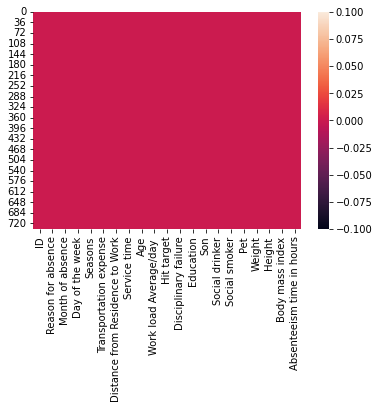

In [6]:
sns.heatmap(dados_df.isnull());

# Tratamento dos dados: 

Noso objetivo é identificar as caracteristicas e perfil dos funcionários que faltam e os que não faltam;

Vamos eliminar alguns atributos que são dispensaveis para essa análise: 

Reason for absence = não estamos analisando os motivos, mas a falta no trabalho, é um atributo que pode ser deletado neste estudo de caso.

Month of absence, Day of the week', 'Seasons', = buscamos o número de faltas e não um período de faltas.

Weight,Heigh', Body mass index = são dados muito subjetivos, para nossa análise não influênciara no número de faltas;

Pet = é um dado mais objetivo que subjetivo.

# **Data processing: **

Our objective is to identify the characteristics and profile of the missing and non-missing employees;

Let's eliminate some attributes that are not necessary for this analysis:

Reason for absence = we are not analyzing reasons, but absence at work is an attribute that can be deleted in this case study.

Month of absence, Day of the week', 'Seasons', = we look for the number of absences and not a period of absences.

Weight,Heigh', Body mass index = are very subjective data, for our analysis it will not influence the number of absences;

Pet = is more objective than subjective.

In [7]:
dados_df = dados_df.drop(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Hit target', 'Pet', 'Weight','Height', 'Body mass index'], axis=1)   

In [8]:
dados_df['Absenteeism time in hours'] = dados_df['Absenteeism time in hours'].apply(lambda x: 1 if x > 0  else 0) 

In [9]:
dados_df

,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Social smoker,Absenteeism time in hours
0,11,289,36,13,33,239.554,0,1,2,1,0,1
1,36,118,13,18,50,239.554,1,1,1,1,0,0
2,3,179,51,18,38,239.554,0,1,0,1,0,1
3,7,279,5,14,39,239.554,0,1,2,1,1,1
4,11,289,36,13,33,239.554,0,1,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,289,36,13,33,264.604,0,1,2,1,0,1
736,1,235,11,14,37,264.604,0,3,1,0,0,1
737,4,118,14,13,40,271.219,0,1,1,1,0,0
738,8,231,35,14,39,271.219,0,1,2,1,0,0


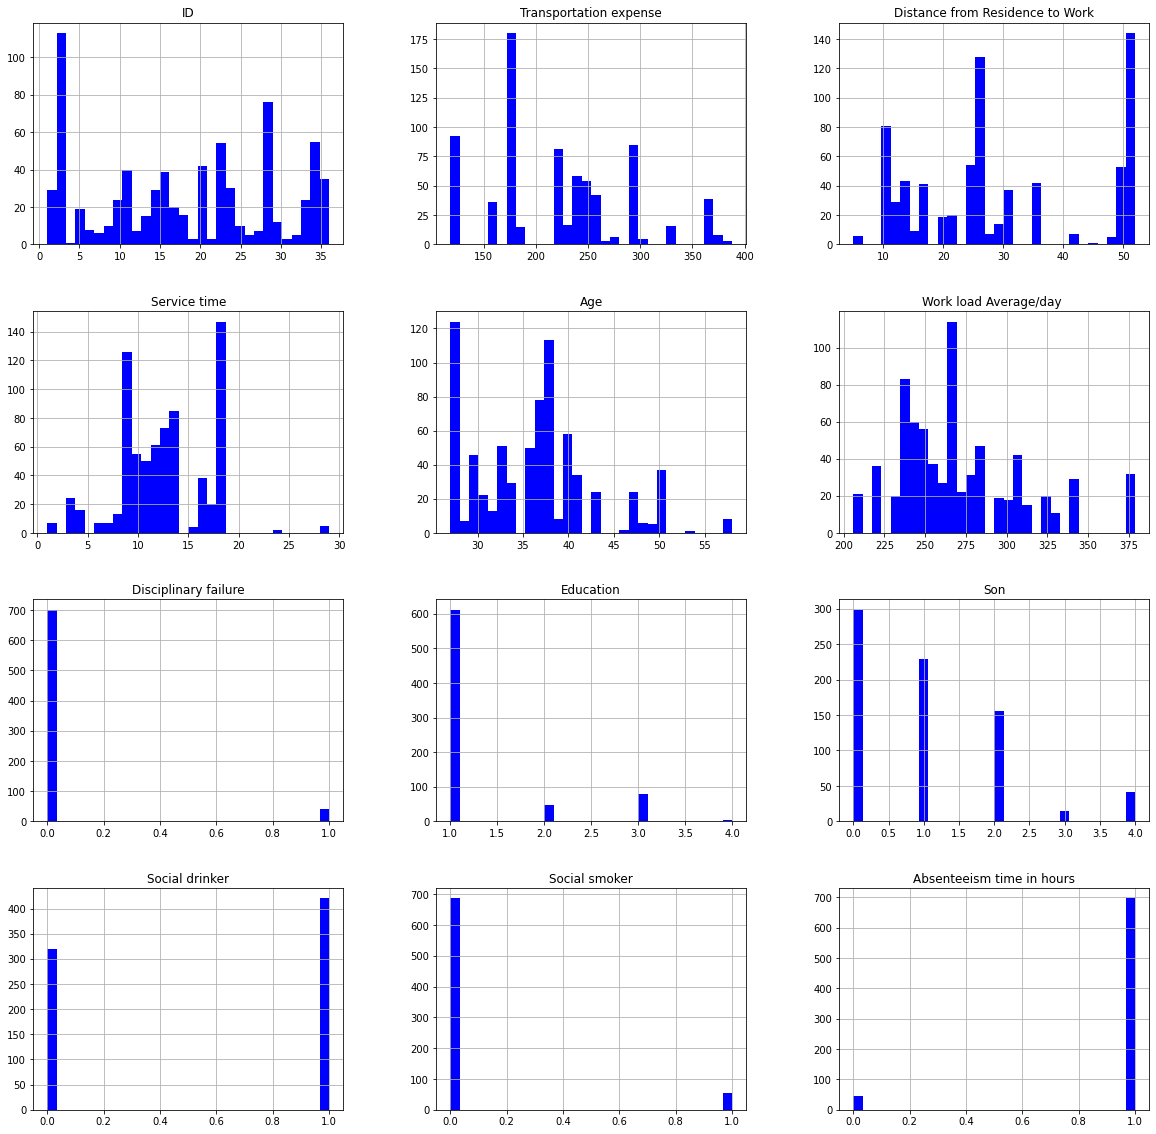

In [10]:
dados_df.hist(bins= 30, figsize=(20,20), color = 'b');

In [11]:
dados_df.shape

(740, 12)

# Vamos Criar dois dataframes para termos uma visão melhor dos números


# Let's Create two dataframes to get a better view of the numbers

In [12]:
missed = dados_df[dados_df['Absenteeism time in hours'] == 1] 
no_missed = dados_df[dados_df['Absenteeism time in hours'] == 0]

In [13]:
###Em português:
print('Total de de funcionários: ', len(dados_df))
print('Número de funcionários que faltaram ao trabalho: ', len(missed))
print('Número de funcionários que não faltaram ao trabalho: ', len(no_missed))
print('Porcentagem de funcionários que faltaram ao trabalho: ', (len(missed) / len(dados_df)) * 100)
print('Porcentagem de funcionários que não faltaram na empresa: ', (len(no_missed) / len(dados_df)) * 100)

Total de de funcionários:  740
Número de funcionários que faltaram ao trabalho:  696
Número de funcionários que não faltaram ao trabalho:  44
Porcentagem de funcionários que faltaram ao trabalho:  94.05405405405406
Porcentagem de funcionários que não faltaram na empresa:  5.9459459459459465


In [14]:
###Em English:
print('Total employees: ', len(dados_df))
print('Number of employees who missed work: ', len(missed))
print('Number of employees who have not missed work: ', len(no_missed))
print('Percentage of employees who missed work: ', (len(missed) / len(dados_df)) * 100)
print('Percentage of employees who not missed work: ', (len(no_missed) / len(dados_df)) * 100)

Total employees:  740
Number of employees who missed work:  696
Number of employees who have not missed work:  44
Percentage of employees who missed work:  94.05405405405406
Percentage of employees who not missed work:  5.9459459459459465


In [15]:
missed.describe()

,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Social smoker,Absenteeism time in hours
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000,696.0,696.000000,696.000000,696.000000,696.000000,696.0
mean,17.992816,219.916667,29.853448,12.553161,36.254310,271.165718,0.0,1.303161,1.000000,0.561782,0.066092,1.0
std,10.974723,65.803295,14.855615,4.440175,6.380725,39.096003,0.0,0.685967,1.098069,0.496525,0.248621,0.0
min,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,0.0,1.000000,0.000000,0.000000,0.000000,1.0
25%,10.000000,179.000000,16.000000,9.000000,31.000000,243.659250,0.0,1.000000,0.000000,0.000000,0.000000,1.0
50%,18.000000,225.000000,26.000000,13.000000,37.000000,264.249000,0.0,1.000000,1.000000,1.000000,0.000000,1.0
75%,28.000000,260.000000,50.000000,16.000000,40.000000,294.217000,0.0,1.000000,2.000000,1.000000,0.000000,1.0
max,36.000000,388.000000,52.000000,29.000000,58.000000,378.884000,0.0,4.000000,4.000000,1.000000,1.000000,1.0


In [16]:
no_missed.describe()

,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Social smoker,Absenteeism time in hours
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0
mean,18.409091,243.681818,26.113636,12.568182,39.545455,276.623500,0.909091,1.113636,1.318182,0.659091,0.181818,0.0
std,11.860268,80.675570,14.239179,3.433066,7.273573,38.529052,0.290803,0.386752,1.073415,0.479495,0.390154,0.0
min,1.000000,118.000000,5.000000,4.000000,28.000000,237.656000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
25%,7.000000,213.500000,13.750000,11.000000,35.250000,244.387000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0
50%,18.500000,235.000000,22.500000,13.000000,39.000000,268.519000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0
75%,29.250000,289.500000,35.250000,14.000000,44.000000,284.236500,1.000000,1.000000,2.000000,1.000000,0.000000,0.0
max,36.000000,388.000000,51.000000,18.000000,53.000000,378.884000,1.000000,3.000000,4.000000,1.000000,1.000000,0.0


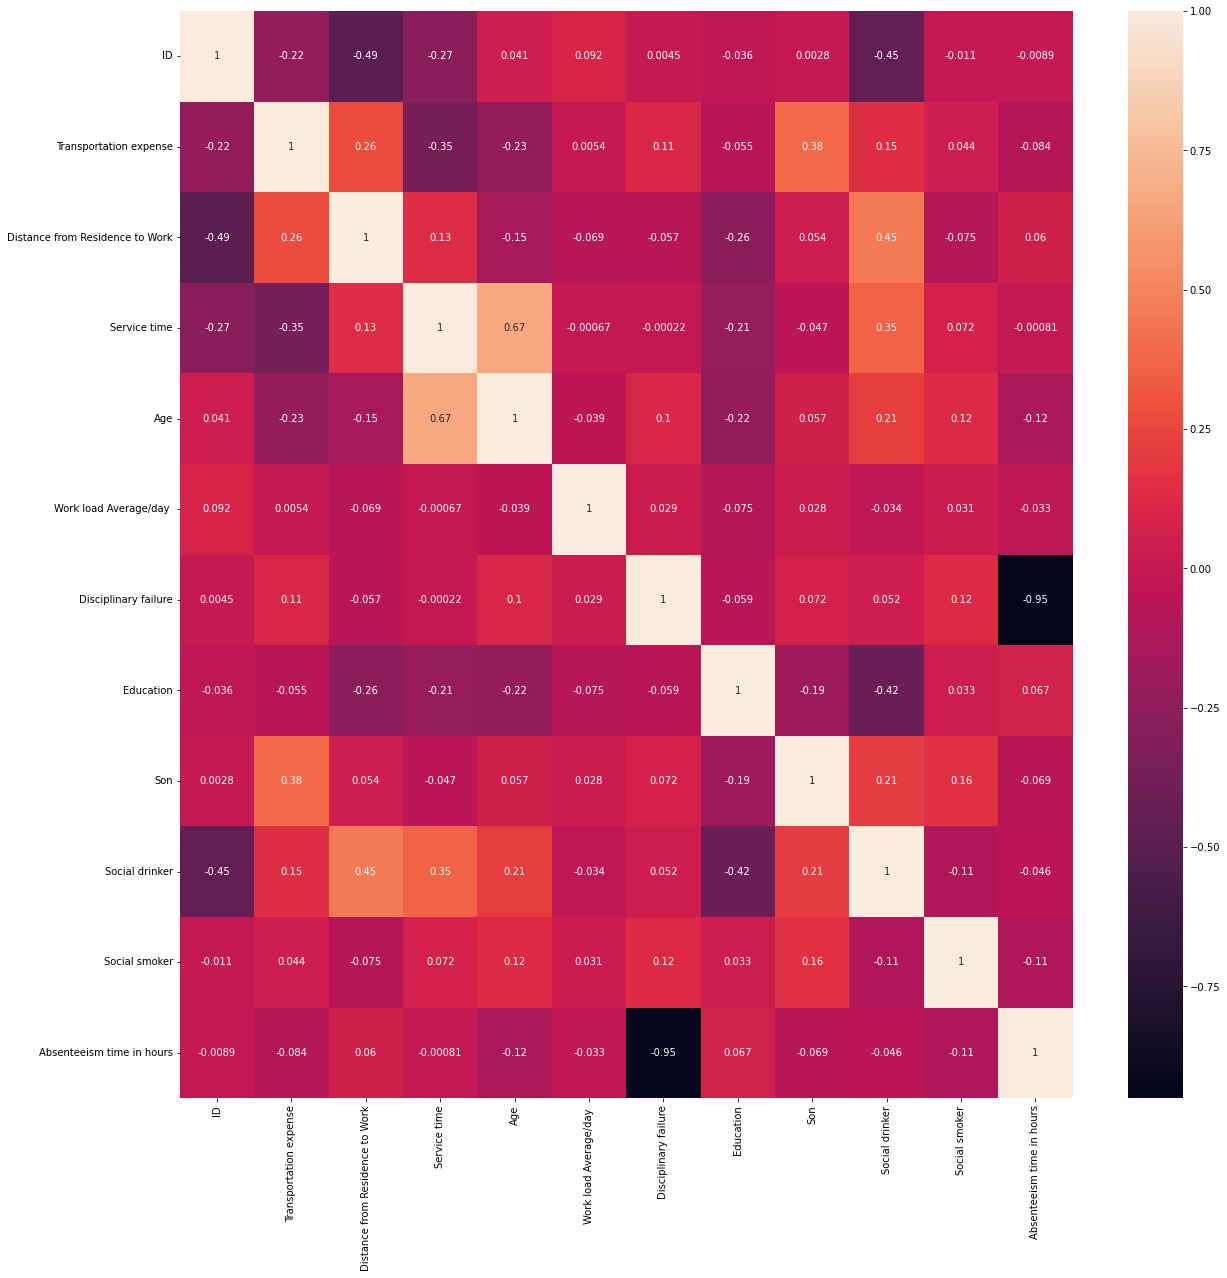

In [17]:
correlations = dados_df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True)
correlations.round(2);

Geralmente imaginamos que as pessoas que possuem mais faltas diciplinares são as que mais se ausentaram no trabalho, o que vemos é ao contrário;


We generally imagine that the people who have the most disciplinary absences are the ones who are absent from work the most, what we see is the opposite;

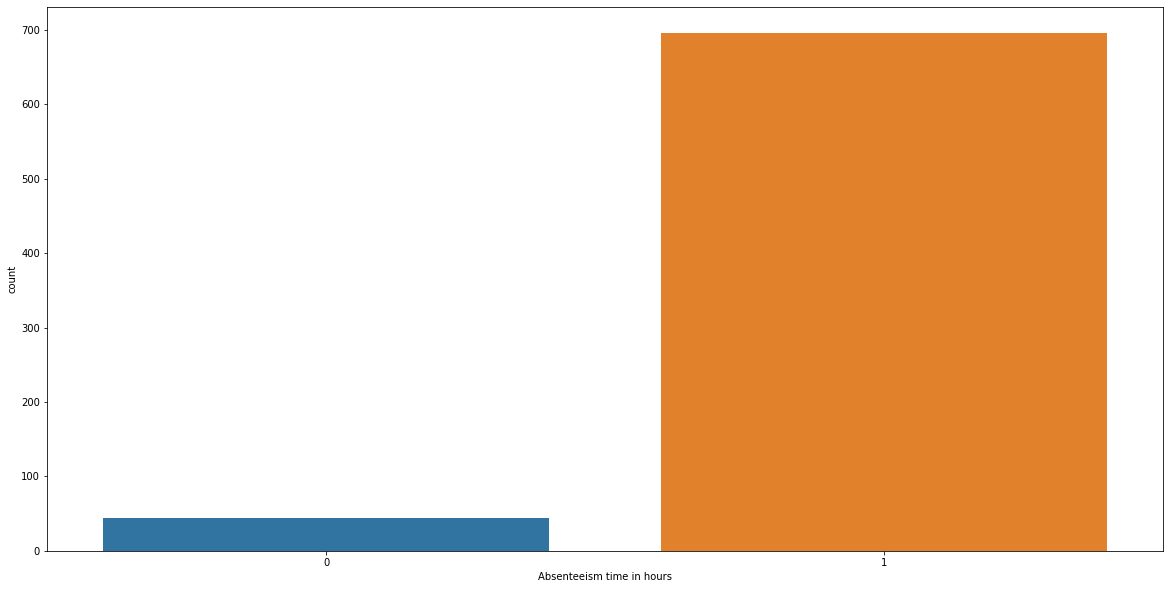

In [18]:
plt.figure(figsize=[20,10])
sns.countplot(x = 'Absenteeism time in hours', data=dados_df);

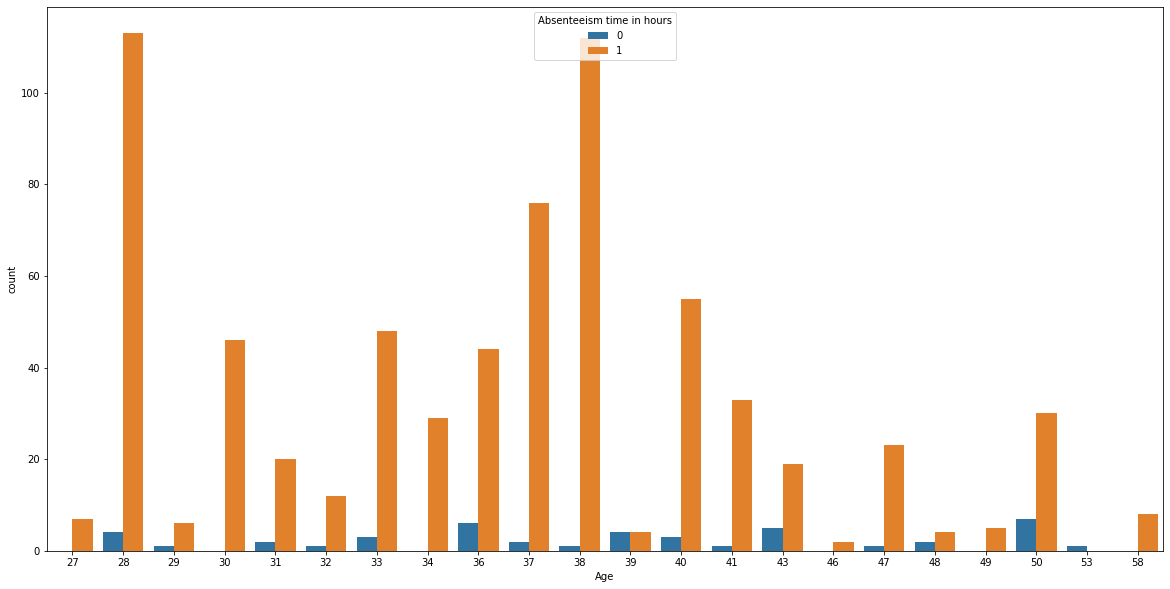

In [19]:
plt.figure(figsize=[20,10])
sns.countplot(x = 'Age', hue= 'Absenteeism time in hours', data=dados_df);

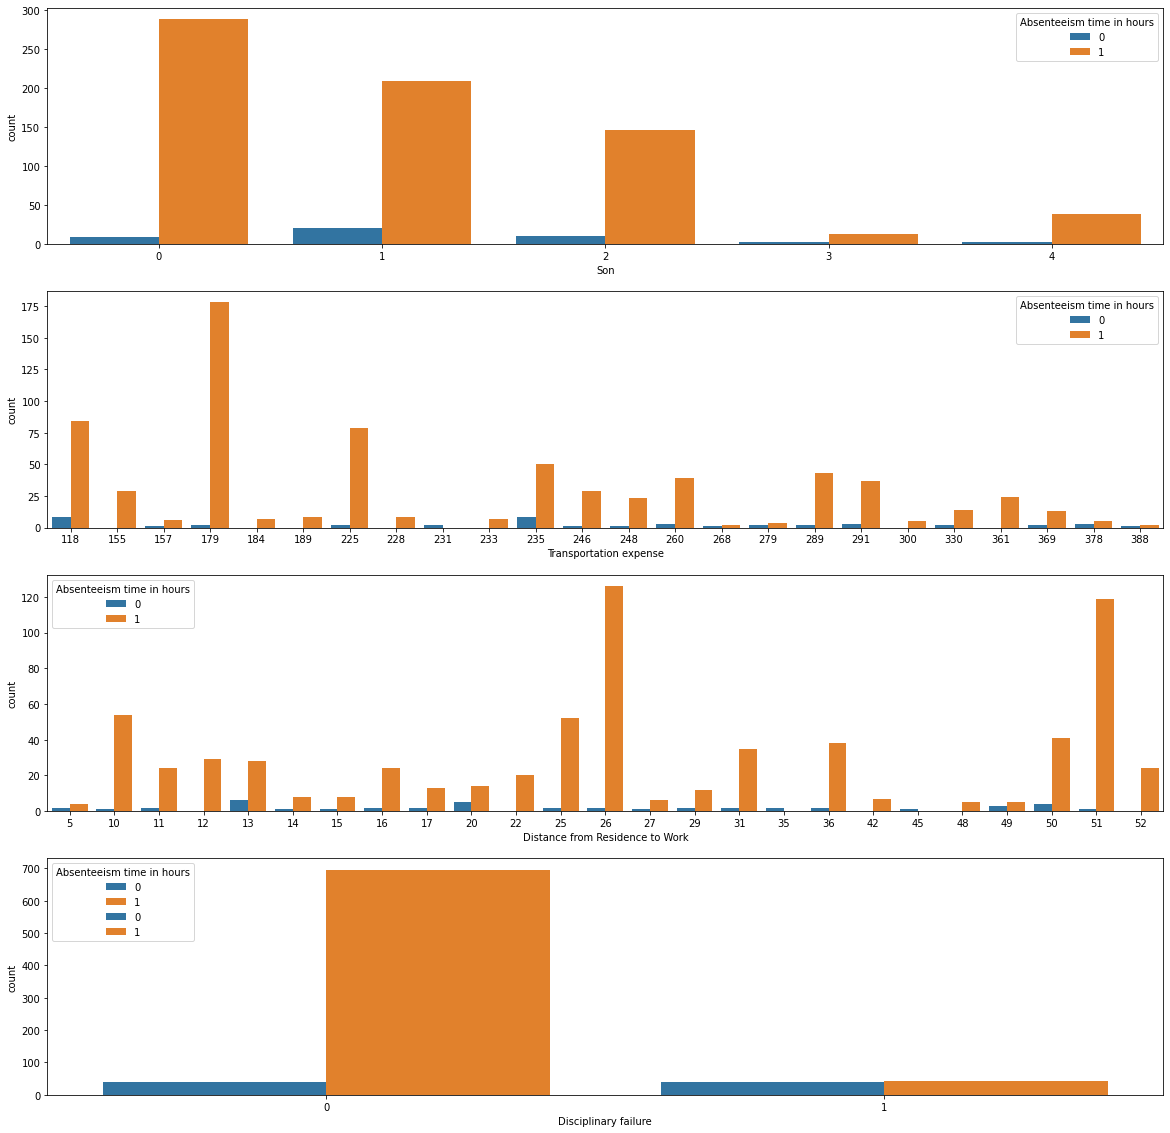

In [20]:
plt.figure(figsize=[20,20])
plt.subplot(411)  
sns.countplot(x = 'Son', hue = 'Absenteeism time in hours', data = dados_df)
plt.subplot(412)  
sns.countplot(x = 'Transportation expense', hue = 'Absenteeism time in hours', data = dados_df)
plt.subplot(413)  
sns.countplot(x = 'Distance from Residence to Work', hue = 'Absenteeism time in hours', data = dados_df)
plt.subplot(414)  
sns.countplot(x = 'Education', hue = 'Absenteeism time in hours', data = dados_df)
plt.subplot(414)  
sns.countplot(x = 'Disciplinary failure', hue = 'Absenteeism time in hours', data = dados_df);

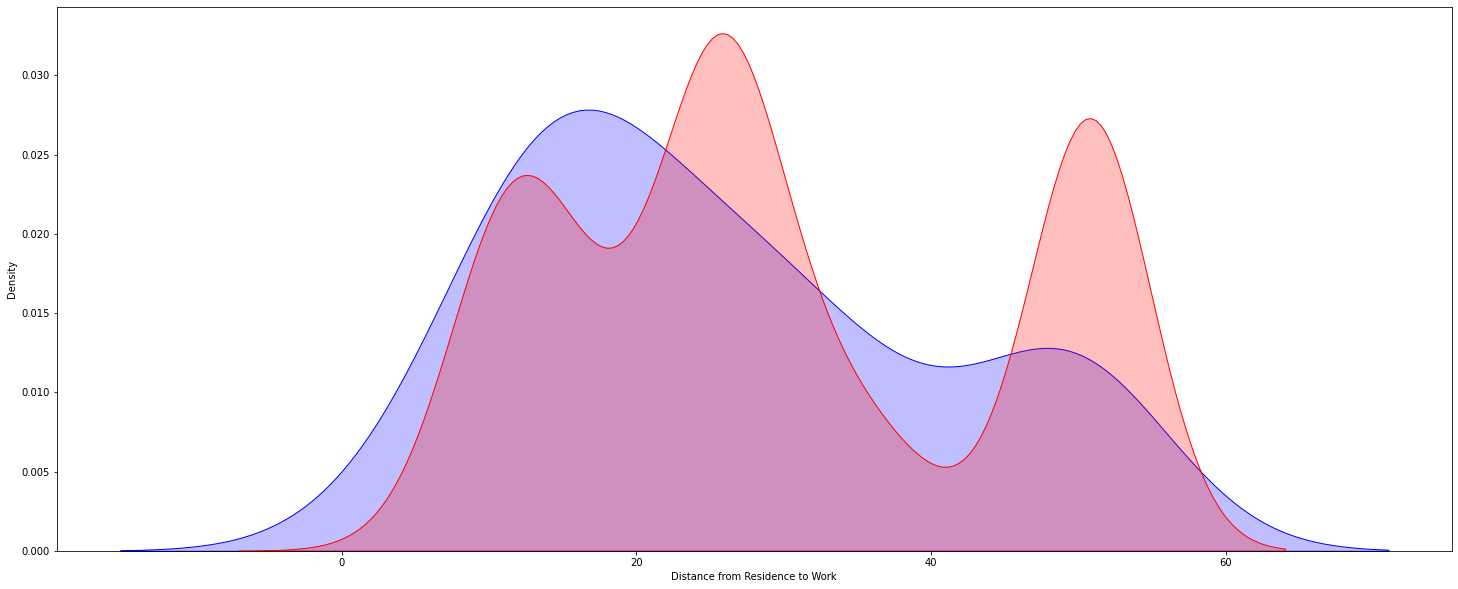

In [21]:
plt.figure(figsize=[25,10])
sns.kdeplot(no_missed['Distance from Residence to Work'], label = 'Funcionários que não faltam', shade = True, color = 'b')
sns.kdeplot(missed['Distance from Residence to Work'], label = 'Funcionários que faltam', shade = True, color = 'r');

# **Vamos fazer uma anáslise mais detalhada do percentual de ausência e seus números**

# **Let's do a more detailed analysis of the percentage of absence and their numbers**

In [22]:
dados_analise = pd.read_csv('../input/absenteeism-at-company/dados.csv')

In [23]:
dados_analise = dados_analise.drop(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Hit target', 'Pet', 'Weight', 'Height', 'Body mass index'], axis = 1) 

In [24]:
dados_analise

,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Social smoker,Absenteeism time in hours
0,11,289,36,13,33,239.554,0,1,2,1,0,4
1,36,118,13,18,50,239.554,1,1,1,1,0,0
2,3,179,51,18,38,239.554,0,1,0,1,0,2
3,7,279,5,14,39,239.554,0,1,2,1,1,4
4,11,289,36,13,33,239.554,0,1,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,289,36,13,33,264.604,0,1,2,1,0,8
736,1,235,11,14,37,264.604,0,3,1,0,0,4
737,4,118,14,13,40,271.219,0,1,1,1,0,0
738,8,231,35,14,39,271.219,0,1,2,1,0,0


In [25]:
eight_less = dados_analise.loc[dados_analise['Absenteeism time in hours'] < 8] # 63% Se ausentaram do trabalho o equivalente a menos de 8 horas;
                                                                               # 63% were absent from work the equivalent of less than 8 hours;

In [26]:
eight_hours =  dados_analise.loc[dados_analise['Absenteeism time in hours'] == 8]      #  => Pessoas que se ausentaram pelo período de 8 horas, que seria o equivalente a 1 dias de trabalho;
                                                                                       ## 208/740*100 = 28% Se ausentaram do trabalho o equivalente a 8 horas de trabalho que seria relativo a um dia inteiro;    
    
                                                                                      # => People who were absent for a period of 8 hours, which would be equivalent to 1 working day;
                                                                                       ## 208/740*100 = 28% Absent from work the equivalent of 8 hours of work that would be related to a whole day;

In [27]:
sixteen_hours = dados_analise.loc[dados_analise['Absenteeism time in hours'] == 16]  # 2,5% Se ausentaram do trabalho o equivalente a 16 horas de trabalho que seria relativo a dois dias inteiros;
                                                                                     # 2.5% were absent from work the equivalent of 16 hours of work that would be related to two full days;

In [28]:
twenty_four = dados_analise.loc[dados_analise['Absenteeism time in hours'] == 24] # 2,16% Se ausentaram do trabalho o equivalente a 24 horas de trabalho que seria relativo a três dias inteiros;
                                                                                  # 2.16% were absent from work the equivalent of 24 hours of work that would be related to three full days;

In [29]:
thirty_two = dados_analise.loc[dados_analise['Absenteeism time in hours'] == 32]     # 0,81 Se ausentaram do trabalho o equivalente a 32 horas de trabalho que seria relativo a quatro dias inteiros;   
                                                                                     # 0.81 Absent from work the equivalent of 32 hours of work that would be related to four full days;

In [30]:
zero = dados_analise.loc[dados_analise['Absenteeism time in hours'] == 0] # 5,94% Não se ausentaram do trabalho em nenhum momento no período de trabalho;   => um dado interessante quase todos tiveram alguma falta diciplinar; 
                                                                          # 5.94% were not absent from work at any time during the work period; => an interesting fact almost all had some disciplinary fault;

In [31]:
obj = {'0 hour': ['5,94%'],'8 less': ['63%'],'8 hours': ['28%'],'16 hours': ['2,5%'],'24 hours': ['2,16%'],'32 hours': ['0,81%']}
df_porcent = pd.DataFrame(data=obj)
df_porcent

,0 hour,8 less,8 hours,16 hours,24 hours,32 hours
0,"5,94%",63%,28%,"2,5%","2,16%","0,81%"


# **Pré Processamento dos Dados**

# **Data Pre-Processing**

In [32]:
X_cat = dados_df[['Transportation expense',	'Distance from Residence to Work',	'Age',	'Disciplinary failure',	'Education',	'Son',	'Social drinker']]

In [33]:
X_cat

,Transportation expense,Distance from Residence to Work,Age,Disciplinary failure,Education,Son,Social drinker
0,289,36,33,0,1,2,1
1,118,13,50,1,1,1,1
2,179,51,38,0,1,0,1
3,279,5,39,0,1,2,1
4,289,36,33,0,1,2,1
...,...,...,...,...,...,...,...
735,289,36,33,0,1,2,1
736,235,11,37,0,3,1,0
737,118,14,40,0,1,1,1
738,231,35,39,0,1,2,1


In [34]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder() 

In [35]:
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [36]:
X_cat.shape   

(740, 84)

In [37]:
type(X_cat)

numpy.ndarray

In [38]:
X_cat = pd.DataFrame(X_cat)

In [39]:
type(X_cat)

pandas.core.frame.DataFrame

In [40]:
X = X_cat

In [41]:
y = dados_df['Absenteeism time in hours']
y

0      1
1      0
2      1
3      1
4      1
      ..
735    1
736    1
737    0
738    0
739    0
Name: Absenteeism time in hours, Length: 740, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [44]:
X_train.shape, y_train

((555, 84),
 424    1
 574    1
 67     1
 596    1
 275    1
       ..
 393    1
 215    0
 263    1
 264    1
 439    1
 Name: Absenteeism time in hours, Length: 555, dtype: int64)

In [45]:
X_test.shape, y_test

((185, 84),
 575    1
 258    1
 382    1
 343    1
 420    1
       ..
 638    1
 621    1
 34     1
 408    1
 32     1
 Name: Absenteeism time in hours, Length: 185, dtype: int64)

# **Regressão Logística**

# **Logistics Regression**

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train) 

LogisticRegression()

In [48]:
y_pred = logistic.predict(X_test)   
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [49]:
y_test 

575    1
258    1
382    1
343    1
420    1
      ..
638    1
621    1
34     1
408    1
32     1
Name: Absenteeism time in hours, Length: 185, dtype: int64

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test, y_pred) # => é um ótimo valor para duas classes;

0.9945945945945946

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 14,   1],
       [  0, 170]])

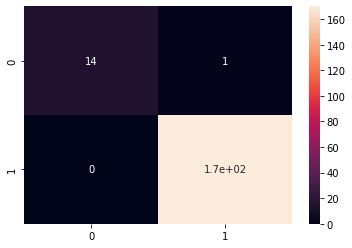

In [54]:
sns.heatmap(cm, annot=True);

# **Sklearn**

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [56]:
precision_score(y_test, y_pred) 

0.9941520467836257

In [57]:
recall_score(y_test, y_pred) 

1.0

In [58]:
f1_score(y_test, y_pred, average='macro')    

0.9812923450298312

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.99      1.00      1.00       170

    accuracy                           0.99       185
   macro avg       1.00      0.97      0.98       185
weighted avg       0.99      0.99      0.99       185



# **Random forest**

In [60]:
from sklearn.ensemble import RandomForestClassifier  

In [61]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
y_pred = forest.predict(X_test)

In [63]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [64]:
accuracy_score(y_test, y_pred)

0.9945945945945946

In [65]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[ 14,   0],
       [  1, 170]])

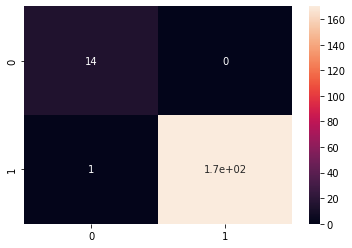

In [66]:
sns.heatmap(cm, annot=True);

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.99      1.00      1.00       170

    accuracy                           0.99       185
   macro avg       1.00      0.97      0.98       185
weighted avg       0.99      0.99      0.99       185



# Redes Neurais

# Neural networks

In [68]:
import tensorflow as tf



In [69]:
X_train.shape

(555, 84)

In [70]:
rede_neural = tf.keras.models.Sequential()  

rede_neural.add(tf.keras.layers.Dense(units = 42, activation='relu', input_shape=(84,))) 
rede_neural.add(tf.keras.layers.Dense(units = 42, activation = 'relu')) 
rede_neural.add(tf.keras.layers.Dense(units = 42, activation = 'relu'))
rede_neural.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))  


2021-10-02 01:04:14.046029: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-02 01:04:14.049046: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-02 01:04:14.049088: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-02 01:04:14.049114: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (41d858c208e9): /proc/driver/nvidia/version does not exist
2021-10-02 01:04:14.049471: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

In [71]:
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 42)                3570      
_________________________________________________________________
dense_1 (Dense)              (None, 42)                1806      
_________________________________________________________________
dense_2 (Dense)              (None, 42)                1806      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 43        
Total params: 7,225
Trainable params: 7,225
Non-trainable params: 0
_________________________________________________________________


In [72]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy']) 

In [73]:
rede_neural.fit(X_train, y_train, epochs=100)

2021-10-02 01:04:15.002752: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-02 01:04:15.016828: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/100
18/18 [==============================] - 1s 1ms/step - loss: 0.6976 - accuracy: 0.4597
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 0.3991 - accuracy: 0.9489
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.1801 - accuracy: 0.9531
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1756 - accuracy: 0.9413
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0874 - accuracy: 0.9658
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.1285 - accuracy: 0.9376
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0998 - accuracy: 0.9420
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0839 - accuracy: 0.9486
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0793 - accuracy: 0.9713
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.9954
Epoch 11/

In [74]:
y_pred = rede_neural.predict(X_test)

In [75]:
y_pred

array([[9.9997765e-01],
       [9.9998093e-01],
       [9.9998689e-01],
       [9.9991858e-01],
       [9.9991858e-01],
       [9.9998689e-01],
       [9.9999070e-01],
       [9.7807950e-01],
       [9.9997735e-01],
       [9.9992919e-01],
       [9.9991858e-01],
       [9.9997735e-01],
       [9.9998093e-01],
       [9.9998093e-01],
       [4.5865796e-05],
       [9.7807950e-01],
       [9.8476481e-01],
       [9.7807950e-01],
       [4.5865796e-05],
       [9.9997735e-01],
       [9.9998271e-01],
       [9.9996006e-01],
       [9.8476481e-01],
       [9.9998689e-01],
       [9.9992919e-01],
       [9.9962461e-01],
       [9.9998093e-01],
       [9.7807950e-01],
       [3.7297010e-03],
       [9.9999785e-01],
       [9.9998689e-01],
       [1.6385317e-04],
       [9.9998266e-01],
       [9.7807950e-01],
       [9.9998689e-01],
       [9.7807950e-01],
       [9.9999070e-01],
       [9.9998271e-01],
       [9.9997830e-01],
       [9.9998271e-01],
       [9.7807950e-01],
       [9.999492

In [76]:
y_pred = (y_pred >= 0.5)  

In [77]:
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [78]:
cm = confusion_matrix(y_test, y_pred)  
cm

array([[ 14,   1],
       [  0, 170]])

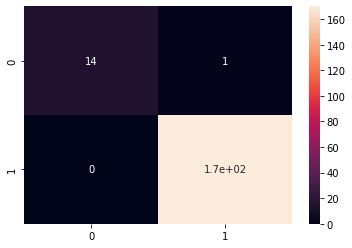

In [79]:
sns.heatmap(cm, annot=True);

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.99      1.00      1.00       170

    accuracy                           0.99       185
   macro avg       1.00      0.97      0.98       185
weighted avg       0.99      0.99      0.99       185



Poderiamos fazer mais análises com outros algoritimos, mas tivemos resultados satisfatório com os que testamos aqui, como é uma base de dados pequena
não há necessidade de fazermos tuning ou a validação cruzada para analisarmos os resultados, Random Forest apresentou melhores resultados.


We could do more analysis with other algorithms, but we had satisfactory results with the ones we've tested here, as it's a small database
there is no need for tuning or cross-validation to analyze the results, Random Forest showed better results.

# **Salvando o Classificador**

In [81]:
import pickle

In [82]:
with open('variaveis_modelo.pkl', 'wb') as f:  
  pickle.dump([onehotencoder, logistic], f) 


In [83]:
with open('variaveis_modelo.pkl', 'rb') as f:
   encoder, model = pickle.load(f)

In [84]:
encoder, model  

(OneHotEncoder(), LogisticRegression())

In [85]:
X_novo = dados_df.iloc[0:1]      #  nosso 'novo' funcionário na empresa;
X_novo                           # our 'new' employee in the company;


,ID,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Disciplinary failure,Education,Son,Social drinker,Social smoker,Absenteeism time in hours
0,11,289,36,13,33,239.554,0,1,2,1,0,1


In [86]:
X_cat_novo = X_novo[['Transportation expense',	'Distance from Residence to Work',	'Age',	'Disciplinary failure',	'Education',	'Son',	'Social drinker']]  
X_cat_novo

,Transportation expense,Distance from Residence to Work,Age,Disciplinary failure,Education,Son,Social drinker
0,289,36,33,0,1,2,1


In [87]:
X_cat_novo = encoder.transform(X_cat_novo).toarray() 

In [88]:
X_cat_novo

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 1.]])

In [89]:
X_cat_novo = pd.DataFrame(X_cat_novo)
X_cat_novo

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [90]:
model.predict(X_cat_novo)  # Um funcionário com esse perfil tem chances de se ausentar no período de trabalho;
                           # An employee with this profile is likely to be absent from work;

array([1])

In [91]:
model.predict_proba(X_cat_novo)   # A probabilidade da ausência é 98%;
                                  
                                  # The probability of absence is 98%;

array([[0.00782053, 0.99217947]])

In [92]:
model.classes_

array([0, 1])

# **Conclusão**

O Dataset possui alguns dados muito interessantes;

 - Os funcionários que mais se ausentam do trabalho não são aqueles que possuem filhos, mas os que não tem filhos e estão na casa dos 28 anos de idade;
 
 - Muitas vezes imaginamos que funcionários com mais filhos podem se ausentar mais do trabalho, mas o que observamos neste caso em estudo é ao contrário, talves pelo fato de terem mais filhos e mais responsábilidade, necessitam mais do emprego;
 
 - Os dias da semana com mais ausência é a segunda-feira;
 
 - Entre os meses, janeiro é o com menor nível de ausências no trabalho, certamente devido as férias e as proximidades com o carnaval;
 
 
 Abaixo segue um resumo dos dados elabora pelo Power BI.
 


# **Conclusion**

The Dataset has some very interesting data;

 - The employees who are most absent from work are not those who have children, but those who do not have children and are around 28 years old;
 
 - We often imagine that employees with more children can be absent from work longer, but what we see in this case study is the opposite, perhaps because they have more children and more responsibility, they need more work;
 
 - The days of the week with the most absence are Mondays;
 
 - Between the months, January is the one with the lowest level of absences from work, certainly due to the holidays and the proximity to Carnival;
 
 
 Below is a summary of the data elaborated by Power BI.

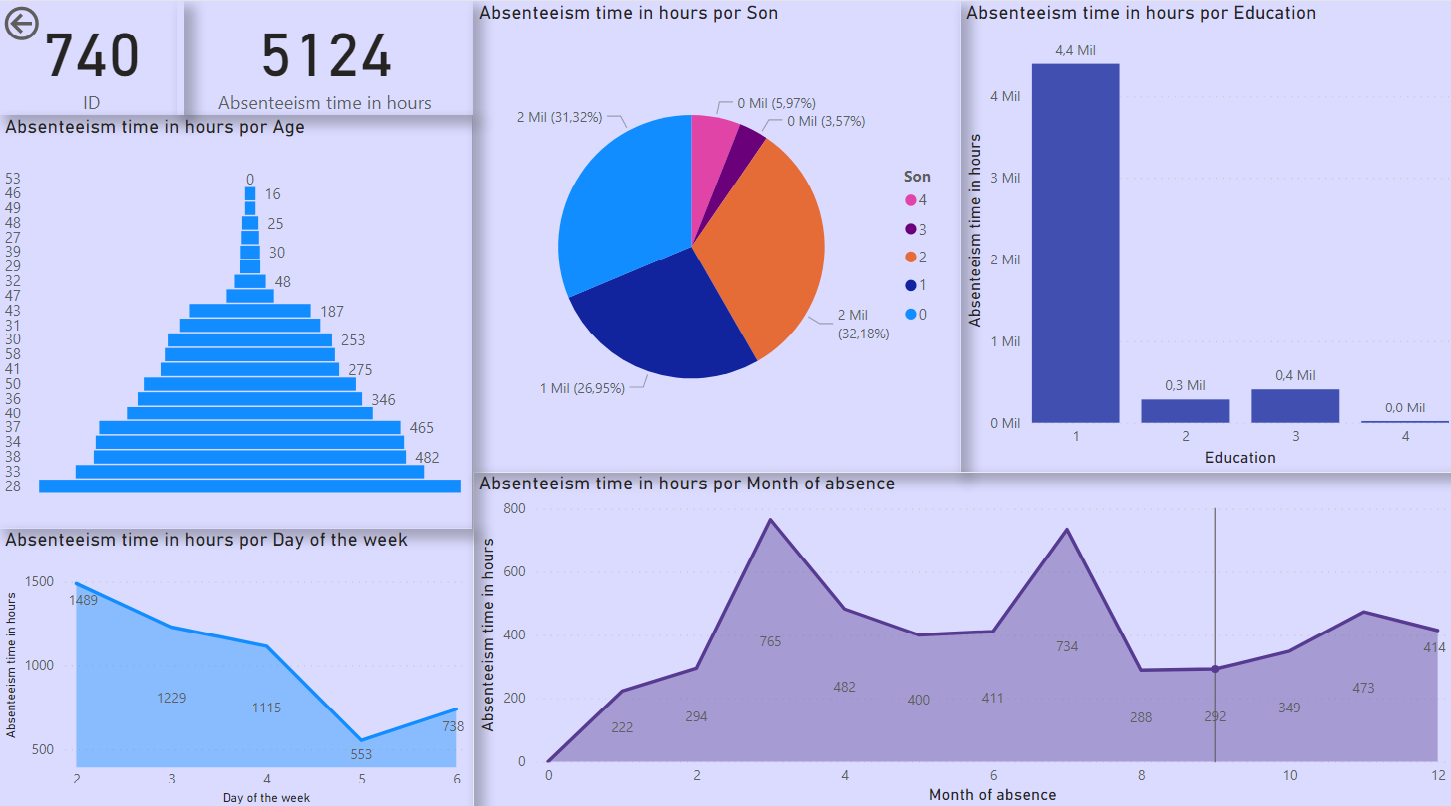

In [93]:
from IPython.display import Image
Image("../input/powerbi/dados.png")